## Practica 1 - Computer Vision

# Importación de librerías

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Exploración de archivos

In [2]:
# Rutas a los archivos de anotaciones
path_train = os.path.join(os.getcwd(), 'data', 'practica_1_dataset', 'train', 'annotations.csv')
path_valid = os.path.join(os.getcwd(), 'data', 'practica_1_dataset', 'valid', 'annotations.csv')
path_test = os.path.join(os.getcwd(), 'data', 'practica_1_dataset', 'test', 'annotations.csv')

# Cargar los DataFrames
df_train = pd.read_csv(path_train)
df_valid = pd.read_csv(path_valid)
df_test = pd.read_csv(path_test)

# Contar instancias por clase en cada DataFrame
train_class_counts = df_train['class'].value_counts()
valid_class_counts = df_valid['class'].value_counts()
test_class_counts = df_test['class'].value_counts()

# Combinar los DataFrames para contar las instancias generales por clase
df_combined = pd.concat([df_train, df_valid, df_test])
general_class_counts = df_combined['class'].value_counts()

# Obtener los valores únicos de la columna 'class' del conjunto combinado
valores_unicos = df_combined['class'].unique().tolist()

# Mostrar los resultados
print("Train class counts:")
print(train_class_counts)
print("\nValid class counts:")
print(valid_class_counts)
print("\nTest class counts:")
print(test_class_counts)
print("\nGeneral class counts:")
print(general_class_counts)
print("\nValores únicos en el dataset combinado:")
print(valores_unicos)

Train class counts:
class
fish         1961
jellyfish     385
penguin       330
shark         259
puffin        175
stingray      136
starfish       78
Name: count, dtype: int64

Valid class counts:
class
fish         459
jellyfish    155
penguin      104
puffin        74
shark         57
stingray      33
starfish      27
Name: count, dtype: int64

Test class counts:
class
fish         249
jellyfish    154
penguin       82
shark         38
puffin        35
stingray      15
starfish      11
Name: count, dtype: int64

General class counts:
class
fish         2669
jellyfish     694
penguin       516
shark         354
puffin        284
stingray      184
starfish      116
Name: count, dtype: int64

Valores únicos en el dataset combinado:
['starfish', 'shark', 'fish', 'puffin', 'stingray', 'penguin', 'jellyfish']


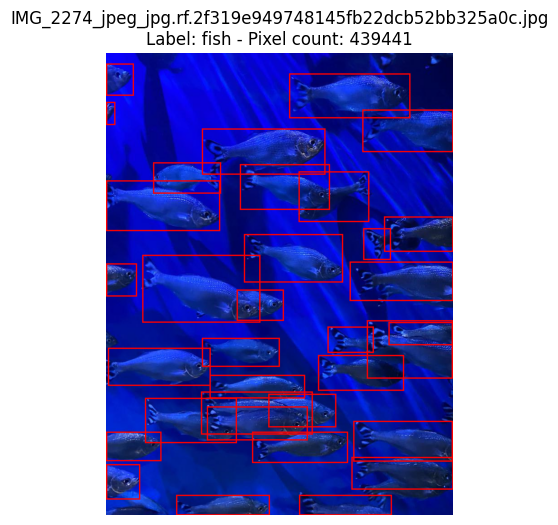

Imagen: IMG_2274_jpeg_jpg.rf.2f319e949748145fb22dcb52bb325a0c.jpg - Label predominante: fish - Pixel count: 439441


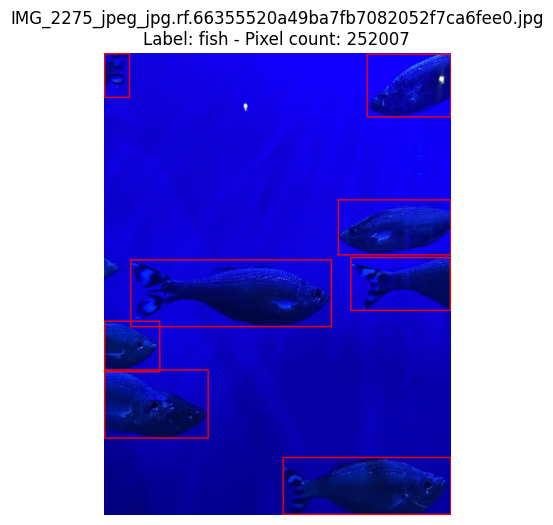

Imagen: IMG_2275_jpeg_jpg.rf.66355520a49ba7fb7082052f7ca6fee0.jpg - Label predominante: fish - Pixel count: 252007


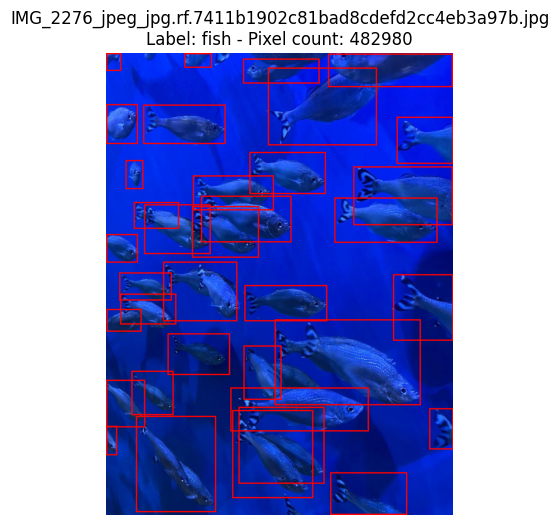

Imagen: IMG_2276_jpeg_jpg.rf.7411b1902c81bad8cdefd2cc4eb3a97b.jpg - Label predominante: fish - Pixel count: 482980


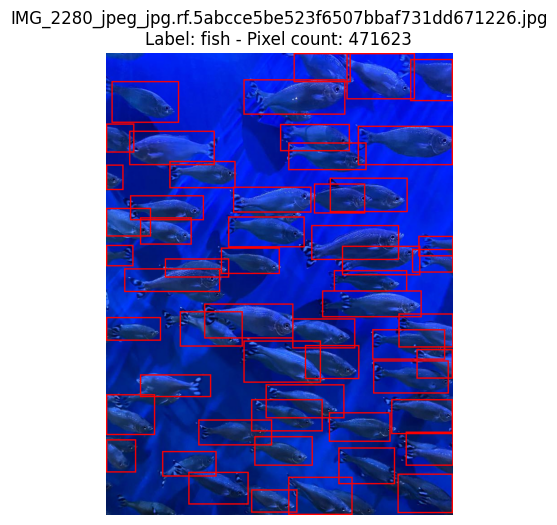

Imagen: IMG_2280_jpeg_jpg.rf.5abcce5be523f6507bbaf731dd671226.jpg - Label predominante: fish - Pixel count: 471623


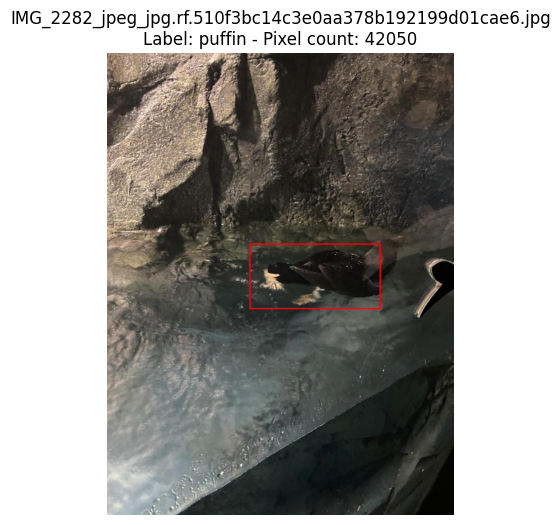

Imagen: IMG_2282_jpeg_jpg.rf.510f3bc14c3e0aa378b192199d01cae6.jpg - Label predominante: puffin - Pixel count: 42050
Imagen: IMG_2283_jpeg_jpg.rf.4f28032102ddc4534410f9bf474ef1d0.jpg - Label predominante: puffin - Pixel count: 44652
Imagen: IMG_2284_jpeg_jpg.rf.99de11cb5727748bd3eae3afe7b415e6.jpg - Label predominante: puffin - Pixel count: 127788
Imagen: IMG_2285_jpeg_jpg.rf.4a93d99b9f0b6cccfb27bf2f4a13b99e.jpg - Label predominante: puffin - Pixel count: 64149
Imagen: IMG_2286_jpeg_jpg.rf.bbcb2046dedb8e1fb3a9519848c1a4c2.jpg - Label predominante: puffin - Pixel count: 124899
Imagen: IMG_2287_jpeg_jpg.rf.cce12b7bb4e49aa145398504aef84c99.jpg - Label predominante: puffin - Pixel count: 252486
Imagen: IMG_2290_jpeg_jpg.rf.3698fd48defd03b2550f7ba8b68314ee.jpg - Label predominante: puffin - Pixel count: 177750
Imagen: IMG_2291_jpeg_jpg.rf.78e908bd2cc12eafc40a5bf3101b8b39.jpg - Label predominante: puffin - Pixel count: 141712
Imagen: IMG_2292_jpeg_jpg.rf.122a0051d4d65d8651089a2ebbc2ed85.jpg -

In [3]:
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Definir las clases y su mapeo numérico
classes = ['fish', 'jellyfish', 'penguin', 'shark', 'puffin', 'stingray', 'starfish']
class_to_label = {cls: i + 1 for i, cls in enumerate(classes)}
label_to_class = {i + 1: cls for i, cls in enumerate(classes)}

# Ruta al CSV de anotaciones del conjunto de entrenamiento
csv_path = os.path.join(os.getcwd(), 'data', 'practica_1_dataset', 'train', 'annotations.csv')
df = pd.read_csv(csv_path)

# Directorio donde se encuentran las imágenes 
images_dir = os.path.join(os.getcwd(), 'data', 'practica_1_dataset', 'train')

# Lista para almacenar resultados (nombre de imagen, label predominante y conteo de píxeles)
results = []

# Configurar cuántas imágenes se mostrarán en el output
sample_count = 0
SAMPLE_LIMIT = 5  # Puedes ajustar este valor según lo necesario

# Procesar cada imagen agrupando por nombre de archivo
for filename, group in df.groupby('filename'):
    image_path = os.path.join(images_dir, filename)
    try:
        image = Image.open(image_path)
    except FileNotFoundError:
        print(f"Imagen no encontrada: {image_path}")
        continue
    
    # Obtener dimensiones originales (PIL: tamaño es (width, height))
    width, height = image.size
    
    # Crear una máscara (matriz) de ceros con las dimensiones de la imagen (forma = (height, width))
    mask = np.zeros((height, width), dtype=np.uint8)
    
    # Rellenar la máscara: se asigna el código en función de cada bounding box
    for _, row in group.iterrows():
        xmin, ymin = int(row['xmin']), int(row['ymin'])
        xmax, ymax = int(row['xmax']), int(row['ymax'])
        numeric_label = class_to_label.get(row['class'], 0)
        mask[ymin:ymax, xmin:xmax] = numeric_label
    
    # Contar la cantidad de píxeles por clase (excluyendo el valor 0)
    unique, counts = np.unique(mask, return_counts=True)
    pixel_counts = dict(zip(unique, counts))
    if 0 in pixel_counts:
        del pixel_counts[0]
    
    if not pixel_counts:
        print(f"No se detectaron clases en la imagen {filename}")
        continue
    
    # Determinar la clase predominante (la que tenga el mayor número de píxeles)
    predominant_numeric = max(pixel_counts, key=pixel_counts.get)
    predominant_class = label_to_class[predominant_numeric]
    predominant_pixel_count = pixel_counts[predominant_numeric]
    
    # Guardar el resultado en la lista
    results.append({
        'filename': filename,
        'predominant_class': predominant_class,
        'pixel_count': predominant_pixel_count
    })
    
    # Mostrar algunas imágenes de ejemplo con las bounding boxes de la clase predominante
    if sample_count < SAMPLE_LIMIT:
        image_disp = image.copy()
        draw = ImageDraw.Draw(image_disp)
        # Dibujar cada bounding box de la clase predominante (con datos del CSV)
        predominant_annotations = group[group['class'] == predominant_class]
        for _, row in predominant_annotations.iterrows():
            xmin, ymin = int(row['xmin']), int(row['ymin'])
            xmax, ymax = int(row['xmax']), int(row['ymax'])
            draw.rectangle([(xmin, ymin), (xmax, ymax)], outline="red", width=3)
        
        plt.figure(figsize=(8, 6))
        plt.imshow(image_disp)
        plt.title(f"{filename}\nLabel: {predominant_class} - Pixel count: {predominant_pixel_count}")
        plt.axis('off')
        plt.show()
        
        sample_count += 1
    
    print(f"Imagen: {filename} - Label predominante: {predominant_class} - Pixel count: {predominant_pixel_count}")

# Opcional: guardar los resultados en un CSV para su posterior análisis
results_df = pd.DataFrame(results)
results_csv_path = os.path.join(os.getcwd(), 'predominant_results.csv')
results_df.to_csv(results_csv_path, index=False)
print(f"\nResultados guardados en: {results_csv_path}")

